In [4]:
import numpy as np
import matplotlib.pyplot as plt

from lyaf_optdepth import qso_class, bin_class
from lyaf_optdepth import bin_analyze, fitting
from lyaf_optdepth import plotting, utils


import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

In [6]:
# READ THE FULL DR12Q SPECTRA
# IN FUTURE: MAKE IT EFFICIENT BY READING IN ONLY THE 
# DATA THAT IS REQUIRED
qso = qso_class.QSO()
qso.load_data()

Catalog file : /Users/vikrant/Work/MyProject/OptDepth/Data/cat_jan30_v_5_10_0_Z_PCA_1.6_0.fits
Number of objects in the catalog: 162618
Scaling spectra using median


In [8]:
# DEFINE THE BINS
bin1 = bin_class.binObj('bin1', qso, ['ALPHA_V0', 'EW_V0'], [[-2.8, -2.13], [20, 40]], snt=[5, 120])
# bin2 = bin_class.binObj('bin2', qso, ['ALPHA_V0', 'EW_V0'], [[-2.8, - 2.13], [40, 60]], snt=[5, 120])
# bin3 = bin_class.binObj('bin3', qso, ['ALPHA_V0', 'EW_V0'], [[-2.13, -1.46], [20, 33.3]], snt=[5, 120])
# bin4 = bin_class.binObj('bin4', qso, ['ALPHA_V0', 'EW_V0'], [[-2.13, -1.46], [33.3, 46.6]], snt=[5, 120])
# bin5 = bin_class.binObj('bin5', qso, ['ALPHA_V0', 'EW_V0'], [[-2.13, -1.46], [46.6, 60]], snt=[5, 120])
# bin6 = bin_class.binObj('bin6', qso, ['ALPHA_V0', 'EW_V0'], [[-1.46, -0.8], [20, 40]], snt=[5, 120])
# bin7 = bin_class.binObj('bin7', qso, ['ALPHA_V0', 'EW_V0'], [[-1.46, -0.8], [40, 60]], snt=[5, 120])

Building binclass object bin1
Masking pixels outside the range [3700 7000]
Variance corrections applied
Flux calibration corrections applied
The number of objects in this bin are 4625


In [14]:
# MAKE THE COMPOSITES
_ = bin_analyze.analyze(bin1, task='composite', frange=[1070, 1160], suffix='bin1_simple')

All spectra distorted to alpha: -2.3522192839785085


<IPython.core.display.Javascript object>


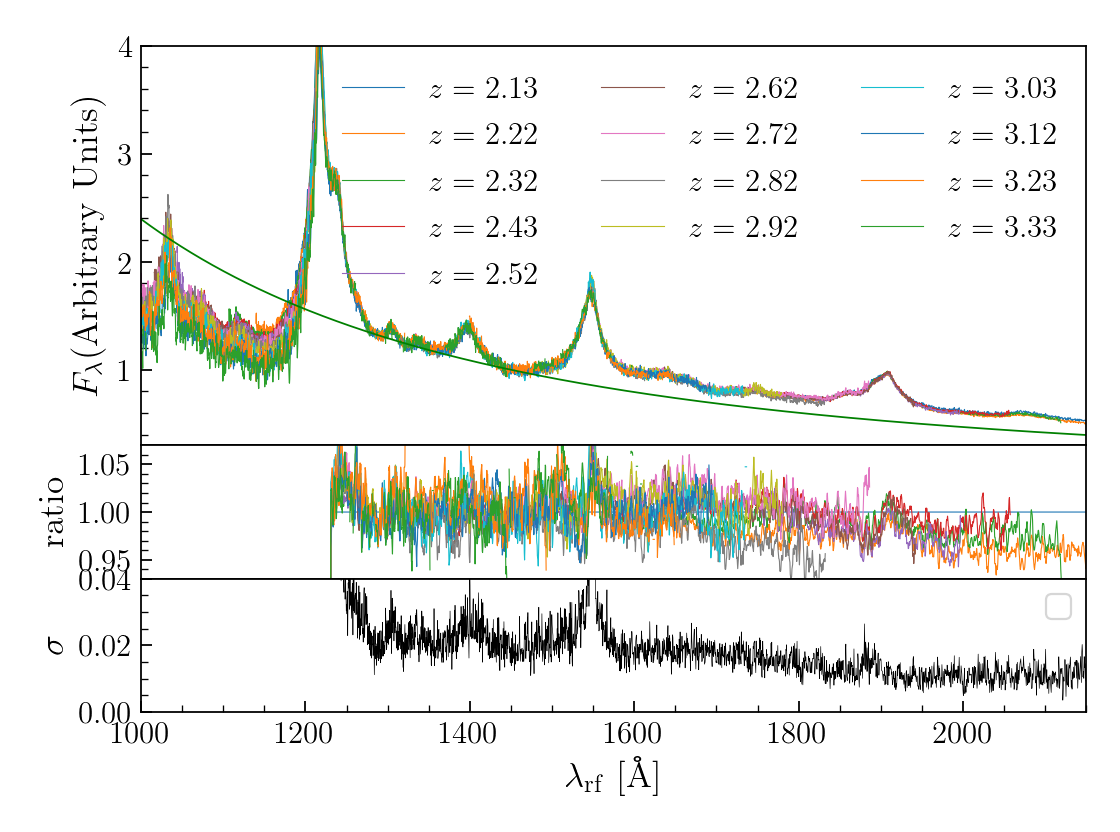

Delta alpha= 0.0
Relative change= 0.0
Delta alpha= -0.12759560740775402
Relative change= 0.03587731746446621
Delta alpha= -0.0505244200229075
Relative change= 0.014055402888514479
Delta alpha= 0.042392942940017685
Relative change= -0.011642884524672104
Delta alpha= 0.025951729085417468
Relative change= -0.007143615000922754
Delta alpha= 0.0696638083694274
Relative change= -0.019060862171398685
Delta alpha= 0.12559101394124347
Relative change= -0.034099972837477344
Delta alpha= -0.16138125105453904
Relative change= 0.04559083242894668
Delta alpha= 0.07567513991800597
Relative change= -0.02068850752758833
Delta alpha= -0.02302154685981469
Relative change= 0.00638004639678158
Delta alpha= 0.04325244740967593
Relative change= -0.011877533179648903
Delta alpha= -0.059891970572729075
Relative change= 0.01668299156935915
Delta alpha= 0.23912017995690538
Relative change= -0.06392320238185856


No handles with labels found to put in legend.


In [17]:
# PLOT THE COMPOSTITES
_ = plotting.plotcomp("../composites/composite_bin1_simple_distort.fits", nskip=2,
                      alpha_fit=-2.35, conf_int=False);

In [18]:
# SET UP THE OPTIMIZER
fit = fitting.Optimizer()

# THIS CAN BE RUN FOR EACH OF THE BINS
fit._set_data_from_fits('../composites/composite_bin1_simple_distort.fits')

In [21]:
# THE BASIC OPTIMIZER PROPERTIES
print("Number of MCMC samples: {}".format(fit.n_mcmc))
print("Fraction of burn-in samples: {}".format(fit.burn_frac))
print("The range of the fitting variable: {}".format(fit.par_limits))

Number of MCMC samples: 5000
Fraction of burn-in samples: 40
The range of the fitting variable: [(0, 3), (-10, 10), (-0.5, 0.5)]


In [20]:
# RUN THE ESTIMATION CODE ON A GIVEN SET OF RESTFRAME WAVELENGTHS
# FOR OUR PROJECT LIES IN [0, 351]
save_path = "../likelihoods/bin1/"
indices = [0, 100, 200, 300]

_ = fit.fit_batch(save_path, indices, parallel=False)

Removed no burn in
14.348466777143713
Removed no burn in
28.537299236719516
Removed no burn in
10.310191439909893
Removed no burn in
29.924434420475947


In [23]:
# DON'T DO THIS ANYMORE -
# USE fit.get_x0_x1 TO GET THESE VECTORS
xx = np.linspace(-10, 10, 100)   
yy = np.linspace(-0.5, 0.5, 100)   

<IPython.core.display.Javascript object>


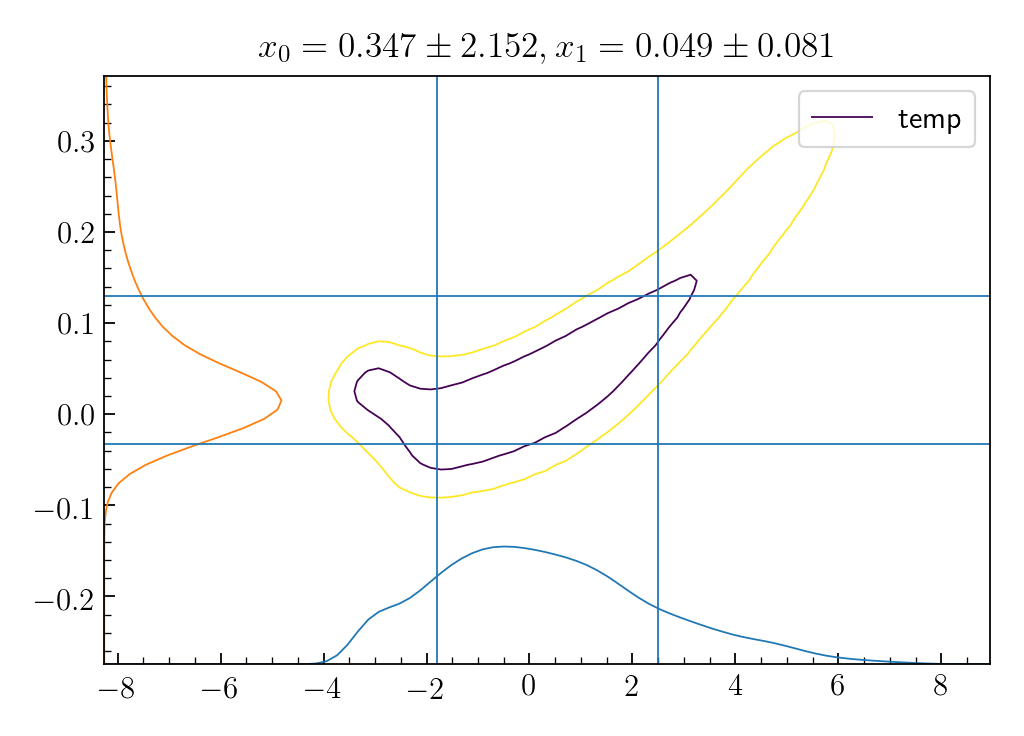

param1 = 0.3470 pm 2.1517
param2 = 0.0485 pm 0.0807



In [25]:
# COMBINE THE LOGPROBABILITIES TO GET A SIMPLE STATISTICAL ESTIMATES
# NO CORRELATION BETWEEN RESTFRAME WAVELENGTHS MODELED HERE

# REFER TO 'utils.get_stretch_factor' FOR GETTING THE STRETCH FACTORS

# TO 'final_estimates.py' THAT INCORPORATES SYSTEMATIC ERRORS

_ = utils.combine_likelihoods("../likelihoods/bin1/", indices, xx, yy)